In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import csv
import xarray as xr
import os
import pandas as pd
import glob

model_name = 'ecmwfsipn'
model_type = 'reforecast'
filepath = '/home/disk/sipn/mcmcgraw/python/data_VRILEs/text_files/MODELS/{model_name}/{model_type}/'.format(model_name=model_name,model_type=model_type)
filenames = glob.glob(filepath+'RAW*_pan*.csv')
print(filenames)

/home/disk/sipn/mcmcgraw/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/disk/sipn/mcmcgraw/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


['/home/disk/sipn/mcmcgraw/python/data_VRILEs/text_files/MODELS/ecmwfsipn/reforecast/RAW_SIC_delta_5day_change_ecmwfsipn_ALL_ENS_panArctic_JJAS.csv', '/home/disk/sipn/mcmcgraw/python/data_VRILEs/text_files/MODELS/ecmwfsipn/reforecast/RAW_SIC_delta_5day_change_56dayLEAD_ecmwfsipn_ALL_ENS_panArctic_JJAS.csv', '/home/disk/sipn/mcmcgraw/python/data_VRILEs/text_files/MODELS/ecmwfsipn/reforecast/RAW_SIC_delta_5day_change_7dayLEAD_ecmwfsipn_ALL_ENS_panArctic_JJAS.csv', '/home/disk/sipn/mcmcgraw/python/data_VRILEs/text_files/MODELS/ecmwfsipn/reforecast/RAW_SIC_delta_5day_change_14dayLEAD_ecmwfsipn_ALL_ENS_panArctic_JJAS.csv']


In [18]:
X_model = pd.read_csv(filenames[0])
X_model = X_model.iloc[:,26:]

In [19]:
fpath_obs = '/home/disk/sipn/mcmcgraw/python/data_VRILEs/text_files/OBS'
fname_obs = glob.glob(fpath_obs+'/NSIDC_SIE_delta*pan*JJAS_NO_dt.txt')
print(fname_obs)
X_obs = pd.read_csv(fname_obs[0])


['/home/disk/sipn/mcmcgraw/python/data_VRILEs/text_files/OBS/NSIDC_SIE_delta_5day_change_panArctic_JJAS_NO_dt.txt']


In [49]:
bins = np.linspace(-0.6,0.6,50)
#Remove nans from X_obs
X_obs = pd.DataFrame(X_obs.replace([np.inf,-np.inf],np.nan))
X_obs.fillna(method='ffill')
X_obs.fillna(method='bfill')
print(X_obs.shape)
H_obs = stats.gaussian_kde(X_obs.iloc[1:,0])
H_obs_plot = H_obs.evaluate(bins)

#Model
no_ens = 25
for iens in np.arange(0,no_ens):
    X_idat = X_model.iloc[iens,:]
    H_mod = stats.gaussian_kde(X_idat)
    H_mod_plot = H_mod.evaluate(bins)
    if iens == 0:
        H_mod_ALL = H_mod
        H_mod_plot_ALL = H_mod_plot
    else:
        H_mod_ALL = np.vstack((H_mod_ALL,H_mod))
        H_mod_plot_ALL = np.vstack((H_mod_plot_ALL,H_mod_plot))
        
print(H_mod_plot_ALL.shape)  

(3659, 1)
(25, 50)


[3.20881517e-03 6.62322354e-04 9.23798801e-04 4.04755175e-03
 7.91087247e-03 1.48286429e-02 2.07459557e-02 2.10950246e-02
 3.50953073e-02 6.80074299e-02 1.10156998e-01 1.36082796e-01
 1.52199862e-01 2.15492272e-01 3.01268190e-01 3.96621217e-01
 5.50606389e-01 7.79617646e-01 1.07072706e+00 1.45259970e+00
 1.91107804e+00 2.36304797e+00 2.87254916e+00 3.39404846e+00
 3.69742554e+00 3.77340774e+00 3.66325021e+00 3.38235526e+00
 2.88180028e+00 2.29322454e+00 1.75049602e+00 1.28846951e+00
 8.81681164e-01 5.33243582e-01 3.24014299e-01 1.93700407e-01
 1.05375521e-01 6.04322418e-02 3.99760036e-02 2.58080081e-02
 1.32807968e-02 7.84382365e-03 9.85031149e-03 1.11903213e-02
 5.61426543e-03 9.08351638e-04 4.39052617e-05 6.23962175e-07
 2.59271618e-09 3.13780854e-12]


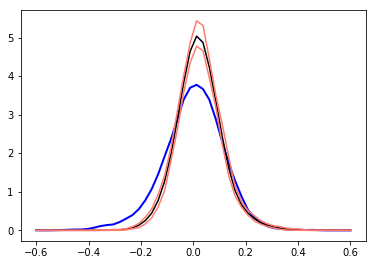

In [53]:
print(H_obs_plot)
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(bins,H_obs_plot,'b',linewidth=2)
ax1.plot(bins,np.nanmean(H_mod_plot_ALL,axis=0),'k')
ax1.plot(bins,np.amax(H_mod_plot_ALL,axis=0),'xkcd:salmon')
ax1.plot(bins,np.amin(H_mod_plot_ALL,axis=0),'xkcd:salmon')